In [74]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

set up categories for our data
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
ageCategory = CategoricalDtype

## Importing, cleaning and wrangling

In [75]:
# import data with a context manager
with open("data.csv") as fp:
    df = pd.read_csv(fp) 

    names = df['last_name'].tolist()
    
    # Drop unnecessary columns from df
    dropcol = ['first_name', 'last_name', 'google_email', 'smarthalo_email', 'accessory_channels', 'submitted_date', 'token']
    df.drop(columns= dropcol, inplace= True)
    
    # convert to categorical data in the df
    catcol = ["age", "gender", "platform", "income", "experience", "rides_per_week", "num_bikes_owned", "bike_cost", "location", "environment", 'accessory_factor', 'smarthalo_versions','crowdfunded_smarthalo' ]
    for col in catcol:
        df[col] = df[col].astype('category')
    
    #only take the data we want, converting to categories data type
#    col_slice_list = ["age", "gender", "platform", "income", "experience", "rides_per_week" ]#,"bike_type","num_bikes_owned","bike_cost","location","environment","companions","conditions","activities"]
#    subsetData = rawDataFrame.loc[:, col_slice_list ].astype('category')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 20 columns):
age                      145 non-null category
gender                   145 non-null category
platform                 145 non-null category
income                   145 non-null category
experience               145 non-null category
rides_per_week           145 non-null category
bike_type                145 non-null object
num_bikes_owned          145 non-null category
bike_cost                145 non-null category
location                 145 non-null category
environment              145 non-null category
companions               145 non-null object
conditions               145 non-null object
activities               145 non-null object
reasons_to_bike          145 non-null object
reasons_to_not_bike      145 non-null object
reason_for_smarthalo     145 non-null object
smarthalo_versions       145 non-null category
crowdfunded_smarthalo    145 non-null category
accessory_factor

In [77]:
for i in catcol:
    print(df[i].value_counts(dropna=False), '\n')

35-44 years    49
55+ years      32
45-54 years    31
25-34 years    30
0-25 years      3
Name: age, dtype: int64 

Male                 126
Female                14
Non-binary             4
Prefer not to say      1
Name: gender, dtype: int64 

iOS        85
Android    60
Name: platform, dtype: int64 

80,000+ / year            51
40,000 - 79,000 / year    45
Prefer not to say         26
0 - 39,999 / year         23
Name: income, dtype: int64 

8     50
7     33
9     29
10    17
6     11
5      4
4      1
Name: experience, dtype: int64 

3 or more times a week    105
1-2 times a week           28
Less than once a week      12
Name: rides_per_week, dtype: int64 

2     56
1     52
3+    37
Name: num_bikes_owned, dtype: int64 

500 - 1000       45
1000 - 2000      43
2000 - 4000      29
100 - 500        14
4000+            13
Less than 100     1
Name: bike_cost, dtype: int64 

United States     46
Canada            28
Netherlands       15
France            13
Germany           13
United

In [78]:
#for i in catcol:
#sns.barplot(data = df['income'])
#plt.hist(df['income'], data= df['income'].value_counts())
#plt.show()

In [79]:
#subsetData.iloc[:,0].unique()
#subsetData.columns.tolist()

## EDA

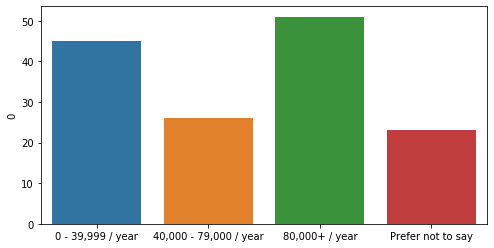

In [80]:
income = df['income'].value_counts(dropna=False).tolist()
income_index = df['income'].unique().tolist()
df_income = pd.DataFrame(income, income_index,)
df_income.sort_index(inplace=True)
plt.figure(figsize=[8,4])
sns.barplot(y= df_income[0], x= df_income.index)

### Descriptive data matrix

In [82]:
# Output a serie of statements to plot a matrix descriptive histogram
# Copy/Paste the output in the next cell

mx = list(range(5))*3
my = list(range(3))*5
my.sort()
coord = list(zip(my, mx))
       
for cat, coord in zip(catcol, coord):
    print('df.groupby({0}{1}{2}).count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[{3}])'.format("'",cat, "'",coord))

df.groupby('age').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 0)])
df.groupby('gender').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 1)])
df.groupby('platform').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 2)])
df.groupby('income').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 3)])
df.groupby('experience').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 4)])
df.groupby('rides_per_week').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 0)])
df.groupby('num_bikes_owned').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 1)])
df.groupby('bike_cost').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 2)])
df.groupby('location').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 3)])
df.groupby('environment').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 4)])
df.groupby('accessory_factor').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(

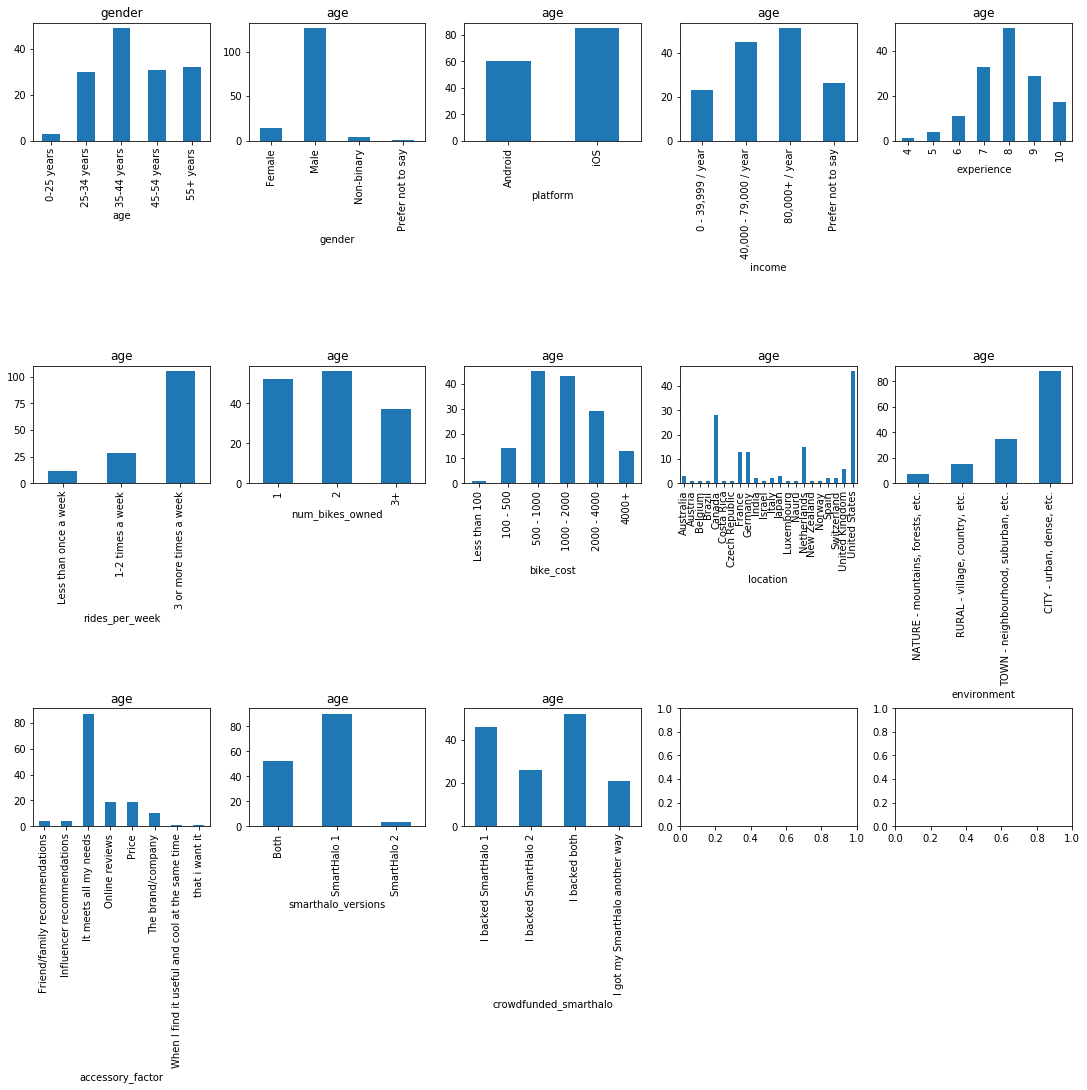

In [83]:
# Generate a matrix descriptive histogram by copy/pasting output from previous cell
# Add .reindex() method by hand where x axis order in not what it should be

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,15), squeeze=False)
df.groupby('age').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 0)])
df.groupby('gender').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 1)])
df.groupby('platform').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 2)])
df.groupby('income').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 3)])
df.groupby('experience').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 4)])
rpw = ['Less than once a week', '1-2 times a week', '3 or more times a week']
df.groupby('rides_per_week').count().iloc[:,0].reindex(rpw).plot(kind="bar", subplots=True, ax=axes[(1, 0)])
df.groupby('num_bikes_owned').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 1)])
bc = ['Less than 100', '100 - 500', '500 - 1000','1000 - 2000', '2000 - 4000', '4000+']
df.groupby('bike_cost').count().iloc[:,0].reindex(bc).plot(kind="bar", subplots=True, ax=axes[(1, 2)])
df.groupby('location').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 3)])
env = ['NATURE - mountains, forests, etc.', 'RURAL - village, country, etc.', 'TOWN - neighbourhood, suburban, etc.', 'CITY - urban, dense, etc.']
df.groupby('environment').count().iloc[:,0].reindex(env).plot(kind="bar", subplots=True, ax=axes[(1, 4)])
df.groupby('accessory_factor').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(2, 0)])
df.groupby('smarthalo_versions').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(2, 1)])
df.groupby('crowdfunded_smarthalo').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(2, 2)])
plt.tight_layout(pad=0.2, w_pad=0.5, h_pad=0.5)

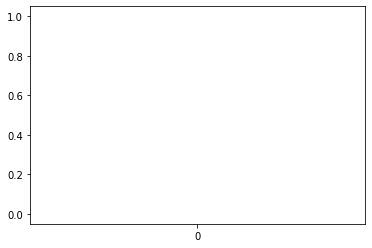

In [85]:
bc_count = df.groupby('bike_cost').count().iloc[:,0].reindex(bc)
sns.stripplot()

### Exploring relationships between categorical features (columns)

#### Hypothesis
People with more experience own more bikes

In [86]:
# Creating a contigency table (output count of occurences for each relationships), normalized in the 'column' axis.
# This way, count of occurences is expressed in relative % of num_bikes_owned for added total of 1.0
# https://pbpython.com/pandas-crosstab.html

ct_exp_nbo = pd.crosstab(df['experience'], df['num_bikes_owned'], normalize='columns', margins=False, margins_name='Total')

# Styled with a background gradient can be use to display some soft of 'heatmap'.
plt.figure(figsize=[8,4])
cm = sns.light_palette("green", as_cmap=True)
ct_exp_nboStyled = ct_exp_nbo.style.background_gradient(cmap=cm)
ct_exp_nboStyled

num_bikes_owned,1,2,3+
experience,,,
4,0.0192308,0,0
5,0.0769231,0,0
6,0.115385,0.0535714,0.0540541
7,0.25,0.25,0.162162
8,0.346154,0.321429,0.378378
9,0.153846,0.214286,0.243243
10,0.0384615,0.160714,0.162162


<Figure size 576x288 with 0 Axes>

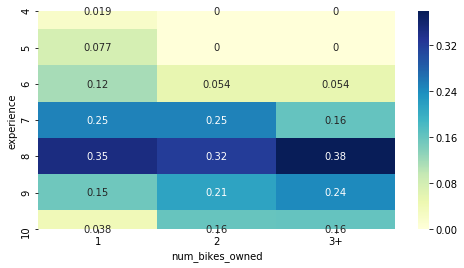

In [87]:
# Feeding crosstap object ct_exp_nbo to generate a nice and proper heatmap of relationships
plt.figure(figsize=[8,4])
sns.heatmap(ct_exp_nbo, cmap="YlGnBu", annot=True, cbar=True)

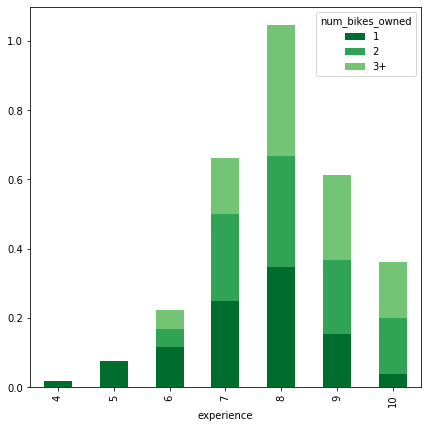

In [88]:
# Same crosstap object, but with a stacked/ segmented barplot
colors = ["#006D2C", "#31A354","#74C476"]
ct_exp_nbo.plot.bar(stacked=True, color=colors, figsize=(7,7))

In [89]:
ct_inc_plf = pd.crosstab(df['income'], df['platform'], normalize='columns', margins=False, margins_name='Total')
ct_inc_plfStyled = ct_inc_plf.style.background_gradient(cmap=cm)
ct_inc_plfStyled

platform,Android,iOS
income,,
"0 - 39,999 / year",0.233333,0.105882
"40,000 - 79,000 / year",0.25,0.352941
"80,000+ / year",0.383333,0.329412
Prefer not to say,0.133333,0.211765


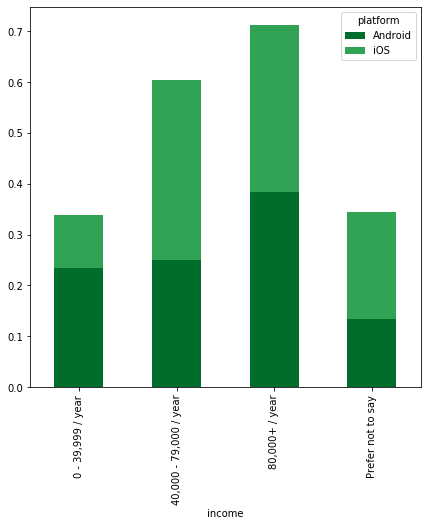

In [90]:
ct_inc_plf.plot.bar(stacked=True, color=colors, figsize=(7,7))

#### Hypothesis
People that own more expensive bike tend to ride it more often

In [95]:
ct_bc_rpw = pd.crosstab(df['bike_cost'], df['rides_per_week'], normalize='columns', margins=False, margins_name='Total').reindex(index=bc, columns=rpw)  
ct_bc_rpwStyled = ct_bc_rpw.style.background_gradient(cmap=cm)
plt.figure(figsize=[4,3])
ct_bc_rpwStyled

rides_per_week,Less than once a week,1-2 times a week,3 or more times a week
bike_cost,,,
Less than 100,0,0,0.00952381
100 - 500,0,0.25,0.0666667
500 - 1000,0.583333,0.464286,0.238095
1000 - 2000,0.25,0.178571,0.333333
2000 - 4000,0.0833333,0.0714286,0.247619
4000+,0.0833333,0.0357143,0.104762


<Figure size 288x216 with 0 Axes>

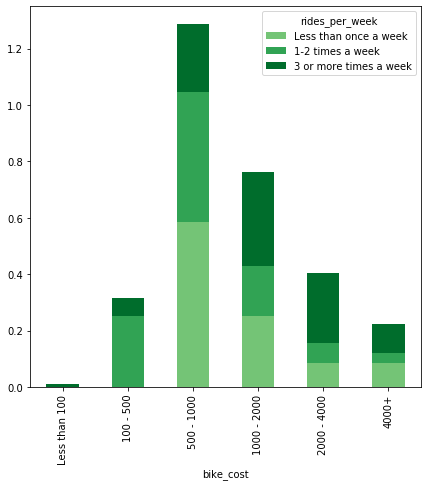

In [96]:
rcolors = ["#74C476", "#31A354", "#006D2C"]
ct_bc_rpw.plot.bar(stacked=True, color=rcolors, figsize=(7,7))

In [97]:
pd.crosstab(df['income'], [df['bike_cost'], df['rides_per_week']])

bike_cost                     100 - 500                         \
rides_per_week         1-2 times a week 3 or more times a week   
income                                                           
0 - 39,999 / year                     3                      2   
40,000 - 79,000 / year                1                      4   
80,000+ / year                        3                      1   
Prefer not to say                     0                      0   

bike_cost                   1000 - 2000                         \
rides_per_week         1-2 times a week 3 or more times a week   
income                                                           
0 - 39,999 / year                     1                      2   
40,000 - 79,000 / year                1                     10   
80,000+ / year                        2                     18   
Prefer not to say                     1                      5   

bike_cost                                         2000 - 4000  \
rides_per_week         Less than once a week 1-2 times a week   
income                                                          
0 - 39,999 / year                          0                0   
40,000 - 79,000 / year                     1                1   
80,000+ / year                             2                0   
Prefer not to say                          0                1   

bike_cost                                                            \
rides_per_week         3 or more times a week Less than once a week   
income                                                                
0 - 39,999 / year                           2                     1   
40,000 - 79,000 / year                      8                     0   
80,000+ / year                              5                     0   
Prefer not to say                          11                     0   

bike_cost                         4000+                         \
rides_per_week         1-2 times a week 3 or more times a week   
income                                                           
0 - 39,999 / year                     0                      0   
40,000 - 79,000 / year                0                      2   
80,000+ / year                        1                      6   
Prefer not to say                     0                      3   

bike_cost                                          500 - 1000  \
rides_per_week         Less than once a week 1-2 times a week   
income                                                          
0 - 39,999 / year                          1                5   
40,000 - 79,000 / year                     0                4   
80,000+ / year                             0                4   
Prefer not to say                          0                0   

bike_cost                                                            \
rides_per_week         3 or more times a week Less than once a week   
income                                                                
0 - 39,999 / year                           4                     2   
40,000 - 79,000 / year                     11                     1   
80,000+ / year                              6                     3   
Prefer not to say                           4                     1   

bike_cost                       Less than 100  
rides_per_week         3 or more times a week  
income                                         
0 - 39,999 / year                           0  
40,000 - 79,000 / year                      1  
80,000+ / year                              0  
Prefer not to say                           0

In [98]:
ct_inc_Vs_exp_nbo = pd.crosstab(df['income'], [df['num_bikes_owned'], df['experience']])
ct_inc_Vs_exp_nbo

num_bikes_owned         1                    2             3+            
experience             4  5  6  7  8  9  10 6  7  8  9  10 6  7  8  9  10
income                                                                   
0 - 39,999 / year       0  2  1  3  1  1  1  0  2  4  2  0  0  1  3  1  1
40,000 - 79,000 / year  1  1  4  5  9  3  0  0  3  6  3  2  0  1  2  5  0
80,000+ / year          0  1  1  3  5  2  0  1  7  6  6  4  1  4  5  2  3
Prefer not to say       0  0  0  2  3  2  1  2  2  2  1  3  1  0  4  1  2

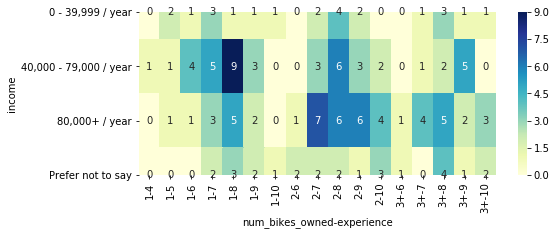

In [99]:
plt.figure(figsize=[8,3])
sns.heatmap(ct_inc_Vs_exp_nbo, cmap="YlGnBu", annot=True, cbar=True)

In [100]:
ct_inc_Vs_exp_nbo2 = pd.crosstab(df['income'], [df['experience'], df['num_bikes_owned']], normalize='index')
ct_inc_Vs_exp_nbo2

experience                    4         5         6                       \
num_bikes_owned                1         1         1         2        3+   
income                                                                     
0 - 39,999 / year       0.000000  0.086957  0.043478  0.000000  0.000000   
40,000 - 79,000 / year  0.022222  0.022222  0.088889  0.000000  0.000000   
80,000+ / year          0.000000  0.019608  0.019608  0.019608  0.019608   
Prefer not to say       0.000000  0.000000  0.000000  0.076923  0.038462   

experience                    7                             8             \
num_bikes_owned                1         2        3+         1         2   
income                                                                     
0 - 39,999 / year       0.130435  0.086957  0.043478  0.043478  0.173913   
40,000 - 79,000 / year  0.111111  0.066667  0.022222  0.200000  0.133333   
80,000+ / year          0.058824  0.137255  0.078431  0.098039  0.117647   
Prefer not to say       0.076923  0.076923  0.000000  0.115385  0.076923   

experience                              9                             10  \
num_bikes_owned               3+         1         2        3+         1   
income                                                                     
0 - 39,999 / year       0.130435  0.043478  0.086957  0.043478  0.043478   
40,000 - 79,000 / year  0.044444  0.066667  0.066667  0.111111  0.000000   
80,000+ / year          0.098039  0.039216  0.117647  0.039216  0.000000   
Prefer not to say       0.153846  0.076923  0.038462  0.038462  0.038462   

experience                                  
num_bikes_owned                2        3+  
income                                      
0 - 39,999 / year       0.000000  0.043478  
40,000 - 79,000 / year  0.044444  0.000000  
80,000+ / year          0.078431  0.058824  
Prefer not to say       0.115385  0.076923

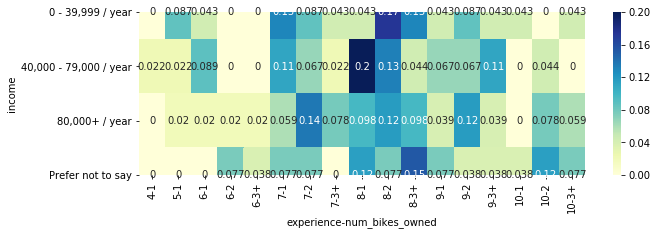

In [101]:
plt.figure(figsize=[10,3])
sns.heatmap(ct_inc_Vs_exp_nbo2, cmap="YlGnBu", annot=True, cbar=True)

In [102]:
# Mosaic chart could be a relevant way to explore multi-dimentionnal relationships between categorical data
# TB explored. See following links for details
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html
# https://sukhbinder.wordpress.com/2018/09/18/mosaic-plot-in-python/
# https://www.youtube.com/watch?v=zLHunbpH5Hg
'''
from statsmodels.graphics.mosaicplot import mosaic
tips = sns.load_dataset('tips')
mosaic(tips, ['sex','smoker','time'])
plt.show()'''

"\nfrom statsmodels.graphics.mosaicplot import mosaic\ntips = sns.load_dataset('tips')\nmosaic(tips, ['sex','smoker','time'])\nplt.show()"

## Exploring ML as analysis tool

### Unsupervized learning in Python Chap3 p. 33
scipy.sparse.csr_matrix

In [103]:
to_sparse = ['bike_type', 'companions', 'conditions', 'activities', 'reasons_to_bike', 'reasons_to_not_bike', 'reason_for_smarthalo']

print('Number of unique combinaison of answer for each questions', '\n')
for i in to_sparse:
    print('{}:  '.format(i.capitalize()), df[i].nunique())

Number of unique combinaison of answer for each questions 

Bike_type:   65
Companions:   14
Conditions:   32
Activities:   115
Reasons_to_bike:   127
Reasons_to_not_bike:   85
Reason_for_smarthalo:   97


### NLP tokenization & sklearn CountVectorizer() 

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer: vec
vec = CountVectorizer(tokenizer=lambda x: x.split(', '))  # Object to convert in matrix of token counts 

# Fit to the data
for i in to_sparse:
    vec.fit(df[i]) # Convert df.bike_type to matrix of token
    print(vec.get_feature_names(), '\n')

#Archives
# TOKENS = '(?:[a-zA-Z1-9/-]|\s)' # Take only strings between ',' as token but, lamba function x.split(', ') works better   
# print("There are {} tokens in the dataset".format(len(vec.get_feature_names())))

['all road', 'bike share bike', 'brompton', 'brompton folding ', 'cargo bike', 'cruiser / city bike', 'e-bike', 'faltrad', 'fat', 'fat bike', 'foldable', 'folding', 'gravel bike', 'hybrid bike', 'mountain bike', 'recumbent', 'recumbent trike', 'road bike', 'single-speed bike', 'speed pedelec (45km/h e-bike)', 'time-trial race bike', 'touring', 'touring bike'] 

['i bike alone', 'with a riding pack', 'with family and friends', 'with young children'] 

['hot/humid', 'night', 'rain', 'snow/ice', 'temperate'] 

['chores / errands', 'commuting', 'fitness', 'mountain biking', 'pleasure rides', 'racing', 'teaching', 'touring', 'transportation', 'work'] 

['endurance training and relaxation', 'i have friends/family who also bike', 'i want to be healthy', 'i want to reduce my environmental impact', 'i want to set a good example for my kids', 'it energizes me', 'it enhances my calm', 'it’s a unique way to see the world', 'it’s cheaper', 'it’s faster', 'it’s more convenient', 'it’s more fun', 'it

In [105]:
# {'col_to_parse': {'value_to_replace': 'replace_with_value'}}
replace_val = {'bike_type': {'gravel bike': 'all road', 'Brompton': 'foldable', 'Brompton folding ': 'foldable', 'folding': 'foldable', 'FALTRAD': 'foldable', 'fat': 'fat bike', 'recumbent trike': 'recumbent', 'speed pedelec (45km/h e-bike)': 'e-bike', 'time-trial race bike': 'road bike', 'touring': 'touring bike'}}
df.bike_type.replace(replace_val, inplace=True)

In [106]:
vec.fit(df['bike_type'])
vec.get_feature_names()

['all road',
 'bike share bike',
 'brompton',
 'brompton folding ',
 'cargo bike',
 'cruiser / city bike',
 'e-bike',
 'faltrad',
 'fat',
 'fat bike',
 'foldable',
 'folding',
 'gravel bike',
 'hybrid bike',
 'mountain bike',
 'recumbent',
 'recumbent trike',
 'road bike',
 'single-speed bike',
 'speed pedelec (45km/h e-bike)',
 'time-trial race bike',
 'touring',
 'touring bike']

In [107]:
df_text = df[to_sparse].apply(lambda x: ", ".join(x), axis=1)
df_text.head()

0    Hybrid bike, I bike alone, Hot/Humid, Night, T...
1    Road bike, I bike alone, Temperate, Rain, Hot/...
2    Hybrid bike, I bike alone, Temperate, Commutin...
3    Hybrid bike, I bike alone, Night, Temperate, R...
4    Mountain bike, With family and friends, Temper...
dtype: object

In [108]:
# Instantiate the CountVectorizer: vec
vec = CountVectorizer(tokenizer=lambda x: x.split(', '))  # Object to convert in matrix of token counts 

# Fit to the data
X = vec.fit_transform(df_text) # Convert df.bike_type to matrix of token
print("There are {} tokens in the dataset".format(len(vec.get_feature_names())))

There are 82 tokens in the dataset


In [109]:
vec.get_feature_names()

['all road',
 'because i have smarthalo 1 and love it ',
 "because it's cool!",
 'bike share bike',
 'brompton',
 'brompton folding ',
 'cargo bike',
 'chores / errands',
 'commuting',
 'cruiser / city bike',
 'e-bike',
 'endurance training and relaxation',
 'faltrad',
 'fat',
 'fat bike',
 'fitness',
 'foldable',
 'folding',
 'for a press review',
 'gravel bike',
 'hot/humid',
 'hybrid bike',
 'i bike alone',
 "i don't know the way",
 "i don't want to sweat",
 'i feel lazy',
 'i have friends/family who also bike',
 'i have to carry things with me',
 'i want to be healthy',
 'i want to reduce my environmental impact',
 'i want to set a good example for my kids',
 'it energizes me',
 'it enhances my calm',
 'it was a gift',
 'it was a gift. but i bought the new model myself',
 "it wouldn't be fun",
 "it's not safe for me",
 "it's not safe for my bike",
 "it's too dark",
 'it’s a unique way to see the world',
 'it’s cheaper',
 'it’s faster',
 'it’s more convenient',
 'it’s more fun',
 'i

In [110]:
# X_train, X_test, y_train, y_test = train_test_split(vec, random_state=456)
df_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

### Unsupervized learning in Python Chap1 p. 31
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

### Unsupervized learning in Python Chap4 p. 7
NMF with word frequency array

In [111]:
from sklearn.decomposition import NMF

matrix = X.toarray()
model = NMF(n_components=5)
model.fit(matrix)
nmf_features = model.transform(matrix)

In [112]:
#nmf_features
df_nmf = pd.DataFrame(nmf_features,index=names)
df_nmf.loc['Denis']

0    0.324235
1    0.000000
2    0.457700
3    0.032528
4    0.266053
Name: Denis, dtype: float64

In [113]:
nmf_features

array([[0.57622749, 0.40019563, 0.        , 0.37881642, 0.        ],
       [0.48494995, 0.        , 0.23148287, 0.37401321, 0.00563147],
       [0.09439161, 0.69012186, 0.12969435, 0.37853788, 0.16453744],
       [0.13694865, 0.45912209, 0.05894664, 0.36622113, 0.57249048],
       [0.        , 0.19111287, 0.20631998, 0.        , 0.58015356],
       [0.62966642, 0.41413083, 0.29604919, 0.03689542, 0.08695188],
       [0.        , 0.07265479, 0.10571039, 0.01258092, 0.44806399],
       [0.38794307, 0.        , 0.29864271, 0.37079314, 0.        ],
       [0.56276071, 0.04658789, 0.21959451, 0.01373903, 0.25927396],
       [0.49177756, 0.        , 0.        , 0.        , 0.35815256],
       [0.        , 0.54996261, 0.15845847, 0.33795733, 0.34599928],
       [0.53601018, 0.33979367, 0.50335469, 0.29480592, 0.        ],
       [0.06986193, 0.50685006, 0.21852615, 0.        , 0.52414106],
       [0.42889064, 0.07587279, 0.21117942, 0.01822361, 0.17578889],
       [0.32423529, 0.        , 0.

In [114]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vec.get_feature_names())

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest(7))

(5, 82)
safest routes)                              3.049341
to help me stay safe (nightlight            3.049341
to help keep my bike safe                   1.029750
because it's cool!                          0.928229
i want to reduce my environmental impact    0.872611
i have to carry things with me              0.833737
to help me navigate                         0.789295
Name: 3, dtype: float64


In [115]:
components_df.head()

,all road,because i have smarthalo 1 and love it,because it's cool!,bike share bike,brompton,brompton folding,cargo bike,chores / errands,commuting,cruiser / city bike,...,to support a new company that came up with a revolutionary design,touring,touring bike,transportation,using the latest gadget is also hobby,why not?,with a riding pack,with family and friends,with young children,work
0,0.000000,0.016720,0.231909,0.192721,0.016575,0.011062,0.248264,0.629390,1.177293,0.315791,...,0.027472,0.054407,0.025926,0.957008,0.00000,0.010643,0.000000,0.000000,0.266683,0.598050
1,0.000000,0.000000,0.000000,0.010573,0.000000,0.015176,0.000000,1.208671,0.780691,0.000000,...,0.000000,0.000000,0.005043,0.383217,0.00000,0.016267,0.240555,0.568806,0.000000,0.000000
2,0.057991,0.000000,1.025569,0.000000,0.000000,0.000000,0.144056,0.000000,0.000000,0.000000,...,0.007282,1.414050,0.006226,0.303775,0.08158,0.000000,0.101803,0.443867,0.012126,1.240904
3,0.000000,0.034074,0.928229,0.000000,0.023684,0.014020,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.430854,0.000000,0.495448,0.00000,0.014734,0.013202,0.000000,0.000000,0.207794
4,0.000000,0.000000,0.401131,0.056912,0.000000,0.000000,0.000000,0.000000,0.508388,0.541816,...,0.000000,0.105396,0.000000,0.574455,0.00000,0.000000,0.000000,0.289960,0.175727,0.000000


In [117]:
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
dfpersona = pd.DataFrame(norm_features, index=names)

# Select the row corresponding to 'Cristiano Ronaldo': article
persona = dfpersona.loc['Haywood']

# Compute the dot products: similarities
similarities = dfpersona.dot(persona)

# Display those with the largest cosine similarity
print(similarities.nlargest(20))

Haywood          1.000000
Bromund          0.992530
White            0.986070
Emmons           0.970333
Pearson          0.960125
Burgess          0.958185
Spinelli         0.951263
Solow            0.948735
DuBois           0.948410
Rathjens         0.948200
Schiske          0.945124
Lortie           0.939662
Lopez            0.901979
Nelson           0.899591
Stoll            0.898533
Bhattacharyya    0.882965
B                0.869185
Franco           0.864635
W                0.863635
Ellens           0.862582
dtype: float64
